In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
import seaborn as sns
import matplotlib.pyplot as plt
import capstone.data as get

from pprint import pprint

sns.set_style('whitegrid')
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['lines.linewidth'] = 1

rs = 88

In [2]:
start_date = '2015-01-01'
end_date = '2023-02-01'

snp_tickers = get.snp_tickers_random(random_state=rs, sample=100)
snp_prices = get.fetch_stock_data(
    snp_tickers, 
    start_date, 
    end_date,
    col='Adj Close'
)

snp_prices.head(3)

,ACN,ADBE,ADM,AFL,AMAT,AMP,APD,AVB,AXP,BA,...,VRSK,WBA,WBD,WDC,WM,WRB,WST,WYNN,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,76.840790,72.339996,40.796490,24.715870,22.201700,107.855621,109.797455,125.664909,81.618019,113.657211,...,62.094345,57.365665,34.480000,92.755737,43.314804,19.023436,50.048450,129.001984,44.099762,23.135220
2015-01-05,75.543396,71.980003,39.384857,24.068438,21.490103,104.393539,106.286766,126.513733,79.459557,112.870064,...,61.288685,56.233444,33.060001,91.529427,42.879562,18.854427,49.357605,126.806435,43.203743,22.268375
2015-01-06,74.998505,70.529999,38.608444,23.853968,20.680664,101.584663,106.249016,128.234100,77.766144,111.540627,...,61.075134,56.376854,31.980000,89.488342,42.913040,18.805599,48.513229,124.101540,42.673454,21.417871


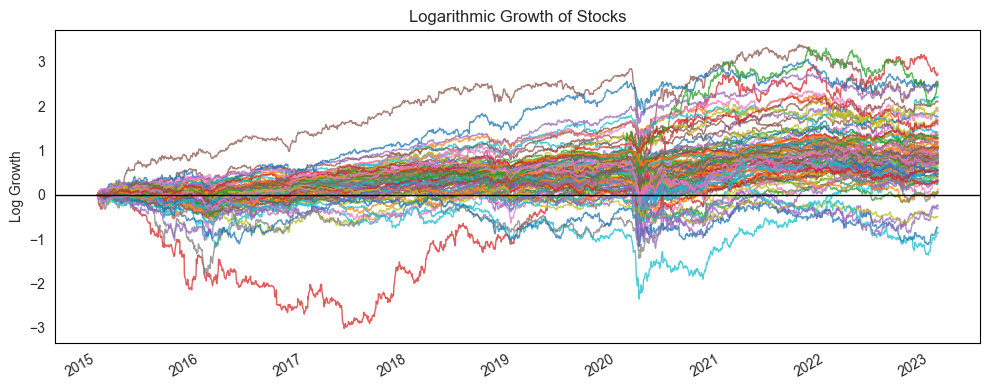

In [3]:
def plot_log_growth(prices, figsize, grid, alpha):
    lr = np.log(prices).diff()
    lr.loc[lr.index.min()] = 0
    lg = lr.cumsum()
    lg.plot(figsize=figsize, grid=grid, alpha=alpha, legend=False)

plot_log_growth(snp_prices, figsize=(10,4), grid=False, alpha=.75)
plt.axhline(0, color='k')
plt.xlabel('')
plt.ylabel('Log Growth')
plt.title('Logarithmic Growth of Stocks')
plt.tight_layout();

In [4]:
# Compute stock returns

snp_returns = snp_prices.pct_change()

snp_returns.head(3)

,ACN,ADBE,ADM,AFL,AMAT,AMP,APD,AVB,AXP,BA,...,VRSK,WBA,WBD,WDC,WM,WRB,WST,WYNN,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016884,-0.004976,-0.034602,-0.026195,-0.032051,-0.032099,-0.031974,0.006755,-0.026446,-0.006926,...,-0.012975,-0.019737,-0.041183,-0.013221,-0.010048,-0.008884,-0.013804,-0.017019,-0.020318,-0.037469
2015-01-06,-0.007213,-0.020145,-0.019713,-0.008911,-0.037666,-0.026907,-0.000355,0.013598,-0.021312,-0.011778,...,-0.003484,0.002550,-0.032668,-0.022300,0.000781,-0.002590,-0.017107,-0.021331,-0.012274,-0.038193


### Indices (4 features)

In [5]:
# Engineer stock features

indices = ['VTI', 'DBC', 'AGG', '^VIX']
index_prices = get.fetch_stock_data(
    indices, 
    start_date, 
    end_date, 
    col='Adj Close'
)

index_prices.head(3)

,AGG,DBC,VTI,^VIX
Date,,,,
2015-01-02,89.478973,17.606205,91.085899,17.790001
2015-01-05,89.673424,17.355103,89.520782,19.920000
2015-01-06,89.900299,17.190920,88.643639,21.120001


In [6]:
# 31-day index rate of change

window = 30

index_roc = index_prices.pct_change(window)
for col in index_roc:
    print(f'{col}:\t{index_roc[col].isnull().sum()}')

AGG:	30
DBC:	30
VTI:	30
^VIX:	30


In [7]:
index_roc.tail(3)

,AGG,DBC,VTI,^VIX
Date,,,,
2023-01-27,0.008419,0.013814,0.019417,-0.179157
2023-01-30,0.003478,-0.006959,0.011406,-0.056764
2023-01-31,0.006124,0.022483,0.053845,-0.150241


### S&P RoC (5 features)

In [8]:
# 30-day average stock rate of change

snp_roc = snp_prices.pct_change(window).mean(axis=1)
snp_roc.isnull().sum()

30

In [9]:
snp_roc.tail(3)

Date
2023-01-27    0.032189
2023-01-30    0.029611
2023-01-31    0.073867
dtype: float64

In [10]:
# 30-day average volatility

snp_std = snp_returns.rolling(window).std().mean(axis=1)

snp_std.isnull().sum()

30

In [11]:
snp_std.tail(3)

Date
2023-01-27    0.018338
2023-01-30    0.018415
2023-01-31    0.018125
dtype: float64

In [12]:
# Daily average volume rate of change

snp_volume = get.fetch_stock_data(
    snp_tickers,
    start_date,
    end_date,
    col='Volume'
)

snp_volume.head(3)

,ACN,ADBE,ADM,AFL,AMAT,AMP,APD,AVB,AXP,BA,...,VRSK,WBA,WBD,WDC,WM,WRB,WST,WYNN,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,2021300,2349200,2039800,2846000,6910200,622200,1453513,565800,2437500,4294200,...,529700,3938500,1979600,966400,3140700,1126125,268900,2228900,2283466,2298700
2015-01-05,3000000,2403300,3828000,4757000,11419800,1068600,1905371,1130700,3469600,5024800,...,885800,4767900,1941300,1662700,3859100,905400,338400,1695100,4418651,5326000
2015-01-06,2867000,2895400,4855700,5819000,19678300,1307600,1280120,983500,4800300,4992800,...,754600,4881600,3869800,2014900,3010900,1490850,430400,1975800,5004401,9086500


In [13]:
# 30-day rate of change of the 30-day rolling average volume

snp_volume_roc = snp_volume.rolling(window).mean().mean(axis=1).pct_change(window)

In [14]:
snp_volume_roc.tail(3)

Date
2023-01-27    0.183869
2023-01-30    0.180276
2023-01-31    0.188332
dtype: float64

In [15]:
# 30-day relative strength rate of change

gains = snp_returns.where(snp_returns > 0, 0)
losses = snp_returns.where(snp_returns < 0, 0)
avg_gain = gains.rolling(window=window).mean().mean(axis=1)
avg_loss = losses.rolling(window=window).mean().mean(axis=1).abs()
snp_rs_roc = (avg_gain / avg_loss).pct_change(window)

snp_rs_roc.isnull().sum()

59

In [16]:
snp_rs_roc.tail(3)

Date
2023-01-27   -0.081326
2023-01-30   -0.048865
2023-01-31    0.143901
dtype: float64

In [17]:
# 30-day rate of change of the 30-day rolling average turnover

turnover = snp_volume * snp_prices
snp_turnover_roc = turnover.rolling(window).mean().mean(axis=1).pct_change(window)
snp_turnover_roc.isnull().sum()

59

In [18]:
snp_turnover_roc.tail(3)

Date
2023-01-27    0.091791
2023-01-30    0.095478
2023-01-31    0.108810
dtype: float64

## Gathering Features and Targets

### Features

In [19]:
# Aggregate features in a DataFrame

stock_features = pd.DataFrame({
    f'tkrs_avg_roc_{window}d': snp_roc,
    f'tkrs_avg_std_{window}d': snp_std,
    f'tkrs_avg_rs_roc_{window}d': snp_rs_roc,
    f'tkrs_avg_vol_avg_roc_{window}d': snp_volume_roc,
    f'tkrs_avg_turnover_avg_roc_{window}d': snp_turnover_roc
})

stock_features.isnull().sum()


tkrs_avg_roc_30d                 30
tkrs_avg_std_30d                 30
tkrs_avg_rs_roc_30d              59
tkrs_avg_vol_avg_roc_30d         59
tkrs_avg_turnover_avg_roc_30d    59
dtype: int64

In [20]:
stock_features = stock_features[window*2-1:]

stock_features.isnull().sum()

tkrs_avg_roc_30d                 0
tkrs_avg_std_30d                 0
tkrs_avg_rs_roc_30d              0
tkrs_avg_vol_avg_roc_30d         0
tkrs_avg_turnover_avg_roc_30d    0
dtype: int64

In [21]:
stock_features.head(3)

,tkrs_avg_roc_30d,tkrs_avg_std_30d,tkrs_avg_rs_roc_30d,tkrs_avg_vol_avg_roc_30d,tkrs_avg_turnover_avg_roc_30d
Date,,,,,
2015-03-30,0.009268,0.014061,-0.118937,-0.047386,-0.050767
2015-03-31,0.002981,0.014054,-0.152607,-0.050512,-0.058257
2015-04-01,-0.003239,0.014147,-0.265269,-0.038825,-0.050884


In [22]:
index_features = index_roc.copy()
index_features.isnull().sum()

AGG     30
DBC     30
VTI     30
^VIX    30
dtype: int64

In [23]:
index_features = index_features[window*2-1:]
index_features.isnull().sum()

# The rest of the NaNs are from filling 0s with np.nan

AGG     0
DBC     0
VTI     0
^VIX    0
dtype: int64

In [24]:
index_features.head(3)

,AGG,DBC,VTI,^VIX
Date,,,,
2015-03-30,0.006017,-0.056284,0.002460,-0.012253
2015-03-31,0.011846,-0.067723,-0.008172,-0.032278
2015-04-01,0.012285,-0.039248,-0.010568,-0.022006


In [25]:
new_index_names = [
    'bond_idx', 'comm_idx', 'stock_idx', 'vol_idx'
]

index_rename = {
    prev: f'{new}_pct_change_{window}d' \
        for prev, new in zip(indices, new_index_names)
}

index_features.rename(columns=index_rename, inplace=True)

index_features.head(3)

,stock_idx_pct_change_30d,comm_idx_pct_change_30d,bond_idx_pct_change_30d,vol_idx_pct_change_30d
Date,,,,
2015-03-30,0.006017,-0.056284,0.002460,-0.012253
2015-03-31,0.011846,-0.067723,-0.008172,-0.032278
2015-04-01,0.012285,-0.039248,-0.010568,-0.022006


In [26]:
features_df = pd.concat([
    stock_features, 
    index_features
], axis=1)

features_df.head(3)

,tkrs_avg_roc_30d,tkrs_avg_std_30d,tkrs_avg_rs_roc_30d,tkrs_avg_vol_avg_roc_30d,tkrs_avg_turnover_avg_roc_30d,stock_idx_pct_change_30d,comm_idx_pct_change_30d,bond_idx_pct_change_30d,vol_idx_pct_change_30d
Date,,,,,,,,,
2015-03-30,0.009268,0.014061,-0.118937,-0.047386,-0.050767,0.006017,-0.056284,0.002460,-0.012253
2015-03-31,0.002981,0.014054,-0.152607,-0.050512,-0.058257,0.011846,-0.067723,-0.008172,-0.032278
2015-04-01,-0.003239,0.014147,-0.265269,-0.038825,-0.050884,0.012285,-0.039248,-0.010568,-0.022006


### Targets

In [27]:
target_df = snp_returns.copy()
target_df.isnull().sum().sum()

97

In [28]:
target_df = target_df[window*2-1:]
target_df.head(3)

,ACN,ADBE,ADM,AFL,AMAT,AMP,APD,AVB,AXP,BA,...,VRSK,WBA,WBD,WDC,WM,WRB,WST,WYNN,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-30,0.005109,0.003956,0.020663,0.010228,-0.002628,0.015265,0.012242,0.011658,0.001026,0.025865,...,0.009648,0.008207,-0.005756,0.002157,0.011423,0.016895,0.022961,0.009584,0.014047,0.021953
2015-03-31,-0.007731,0.004620,-0.000422,-0.002959,-0.009223,-0.001374,-0.016385,-0.010786,0.004242,-0.017158,...,0.003373,-0.015234,-0.010614,-0.015363,0.004074,-0.012705,0.008542,-0.012396,-0.008689,0.000000
2015-04-01,-0.001387,0.015283,0.000633,-0.006874,-0.007535,-0.002905,-0.007866,-0.007690,0.010369,-0.009595,...,0.001820,-0.004960,0.004876,0.014724,-0.010695,-0.006137,-0.055140,-0.002780,0.001524,-0.002593


In [29]:
target_df.isnull().sum().sum()

0

In [30]:
target_df.index.equals(features_df.index)

True

In [31]:
features_df.to_csv('data/features.csv')
target_df.to_csv('data/target_returns.csv')
snp_prices.reindex(target_df.index).to_csv('data/target_prices.csv')